In [3]:
#importing libraries and read dataset 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
dataframe =pd.read_csv("tmdb-movies.csv")
dataframe.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

###Exploring the dataset

In [4]:


print(dataframe.head())
print(dataframe.info())
print(dataframe.describe())


       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

# Handling Outliers
##Z-Score Calculation:

The z-score measures how many standard deviations a data point is from the mean.
For each value in a numerical column, the z-score is calculated using the zscore function from the scipy.stats module.
Typically, a z-score threshold of -3 to 3 is used to identify outliers.
Values outside this range are considered as potential outliers.

The DataFrame is then filtered to keep only the rows where the z-score falls within the specified range.
This removes data points that are considered outliers based on the z-score criter 

In [64]:
# Import the zscore function from the scipy.stats module
from scipy.stats import zscore

# Calculate the z-score for each value in the 'value' column
dataframe['z_score'] = zscore(dataframe['popularity'])

# Keep only the rows where the z-score is within a certain range, e.g., -3 to 3
dataframe = dataframe[(dataframe['z_score'] < 3) & (dataframe['z_score'] > -3)]

# Featuring
Feature engineering is the process of creating new features or modifying existing ones in a dataset to enhance the performance of the data analysis. It involves selecting, transforming, or creating variables that help the model better understand the underlying patterns in the data.

In [65]:
#feature engineering
#feature 1
# converting datatype as needed and Extract relevant information from the release data like the year
dataframe["release_date"] = pd.to_datetime(dataframe["release_date"])
dataframe["release_year"] = dataframe["release_date"].dt.year

#feature 2
#Runtime binning: Group movies into categories based on their runtime to identify relationships between movie length and other variables.

#define the intervals for categorizing runtimes.
#In this case, movies are categorized into three bins: 'short' (0 to 90 minutes), 'medium' (91 to 120 minutes), and 'long' (121 minutes and above)
runtime_bins = [0, 90, 120, float('inf')]

# label for each bins
runtime_labels = ['short', 'medium', 'long']

# Create a new column 'runtime_category' based on the 'runtime' column
dataframe['runtime_category'] = pd.cut(dataframe['runtime'], bins=runtime_bins, labels=runtime_labels)

#feature 3
#Genre One-Hot Encoding:perform one-hot encoding to create binary variables for each genre.
genres = dataframe['genres'].str.get_dummies(sep='|')

# Concatenate the original DataFrame 'dataframe' with the genre dummy variables
dataframe = pd.concat([dataframe, genres], axis=1)

# Feature 4: Revenue-to-Budget Ratio
dataframe['revenue_to_budget_ratio'] = dataframe['revenue'] / dataframe['budget']

# Feature 5: Popularity and Vote Averages Interaction
dataframe['popularity_vote_avg_interaction'] = dataframe['popularity'] * dataframe['vote_average']

#cleaning the data after feature engineering
dataframe= dataframe.dropna()

# print the updated data frame
print(dataframe.head())


C:\Users\Ermi$\AppData\Local\Temp\ipykernel_13228\2219772286.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataframe["release_date"] = pd.to_datetime(dataframe["release_date"])


        id    imdb_id  popularity     budget    revenue  \
34  257445  tt1051904    3.644541   58000000  150170815   
35  264644  tt3170832    3.557846    6000000   35401758   
37  105864  tt1979388    3.339135  175000000  331926147   
39  167073  tt2381111    3.227329   11000000   62076141   
40  277216  tt1398426    3.202719   28000000  201634991   

            original_title                                               cast  \
34              Goosebumps  Jack Black|Dylan Minnette|Odeya Rush|Amy Ryan|...   
35                    Room  Brie Larson|Jacob Tremblay|Joan Allen|Sean Bri...   
37       The Good Dinosaur  Raymond Ochoa|Jack Bright|Jeffrey Wright|Franc...   
39                Brooklyn  Saoirse Ronan|Domhnall Gleeson|Emory Cohen|Emi...   
40  Straight Outta Compton  O'Shea Jackson Jr.|Corey Hawkins|Jason Mitchel...   

                                      homepage          director  \
34            http://www.goosebumps-movie.com/     Rob Letterman   
35                 htt

C:\Users\Ermi$\AppData\Local\Temp\ipykernel_13228\2219772286.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["release_date"] = pd.to_datetime(dataframe["release_date"])
C:\Users\Ermi$\AppData\Local\Temp\ipykernel_13228\2219772286.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["release_year"] = dataframe["release_date"].dt.year
C:\Users\Ermi$\AppData\Local\Temp\ipykernel_13228\2219772286.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

# Perform EDA (Exploratory Data Analysis)
exploring the distribution and the relation among variables

                  id   popularity        budget       revenue      runtime  \
count    1475.000000  1475.000000  1.475000e+03  1.475000e+03  1475.000000   
mean    57023.968814     1.112886  3.626337e+07  1.033136e+08   107.383729   
min        12.000000     0.005391  0.000000e+00  0.000000e+00    10.000000   
25%      8388.000000     0.478503  5.000000e+06  4.020854e+06    94.000000   
50%     22949.000000     0.885834  2.000000e+07  4.181906e+07   104.000000   
75%     65056.000000     1.509500  5.000000e+07  1.323928e+08   116.000000   
max    414419.000000     3.644541  4.250000e+08  1.123747e+09   705.000000   
std     79217.508851     0.823331  4.442921e+07  1.567912e+08    27.122827   

                        release_date   vote_count  vote_average  release_year  \
count                           1475  1475.000000   1475.000000   1475.000000   
mean   2008-10-05 08:52:04.067796736   538.238644      6.156339   2008.236610   
min              1974-04-01 00:00:00    10.000000     

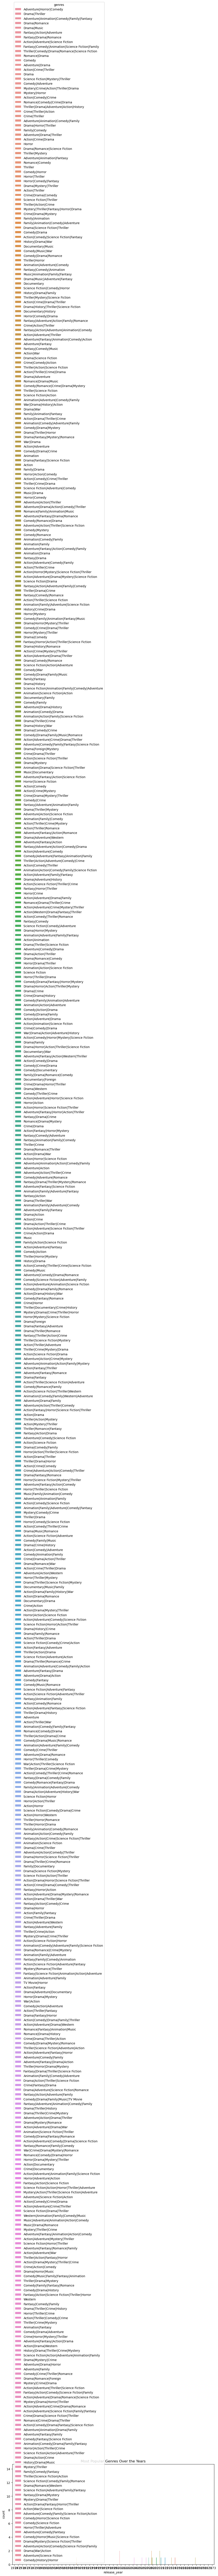

In [71]:
#exploratory data analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Descriptive statistics
print(dataframe.describe())

# Visualizations
# Most Popular Genres Over the Years
plt.figure(figsize=(12, 6))
sns.countplot(x='release_year', hue='genres', data=dataframe)
plt.title('Most Popular Genres Over the Years')
plt.show()


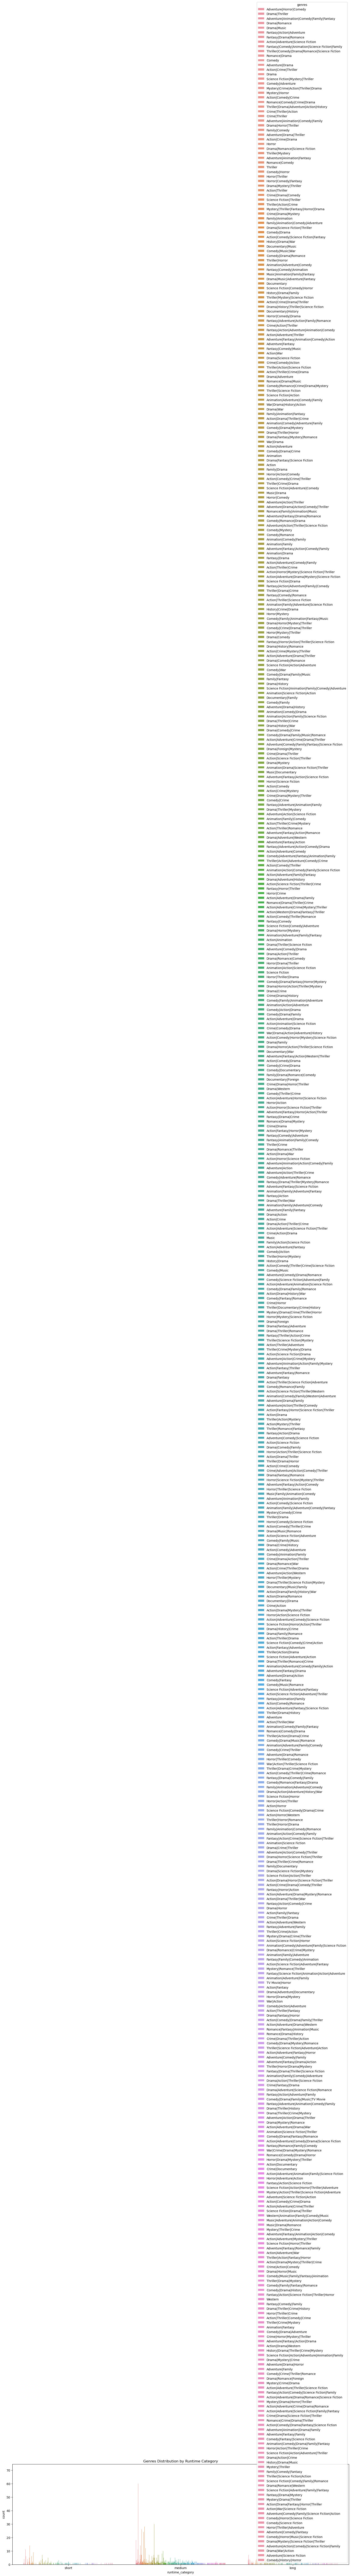

c:\ProgramData\anaconda3\Lib\site-packages\matplotlib\colors.py:1355: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
c:\ProgramData\anaconda3\Lib\site-packages\matplotlib\colors.py:1355: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


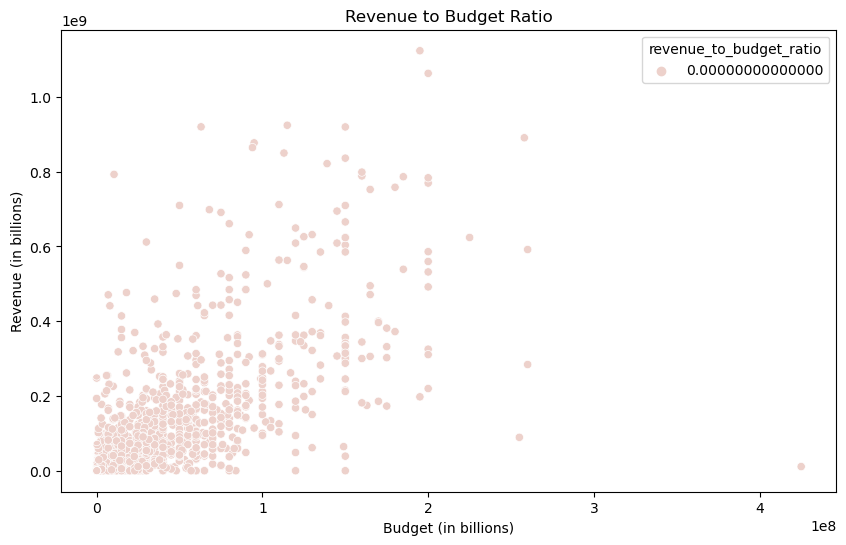

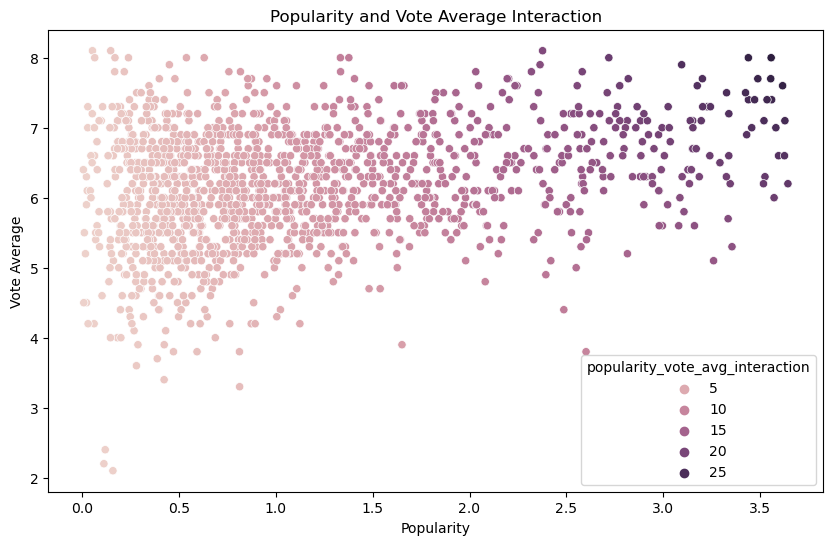

In [68]:
# Runtime Binning
plt.figure(figsize=(20, 6))
sns.countplot(x='runtime_category', hue='genres', data=dataframe)
plt.title('Genres Distribution by Runtime Category')
plt.show()

# Revenue to Budget Ratio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', hue='revenue_to_budget_ratio', data=dataframe)
plt.title('Revenue to Budget Ratio')
plt.xlabel('Budget (in billions)')
plt.ylabel('Revenue (in billions)')
plt.show()

# Popularity and Vote Average Interaction
plt.figure(figsize=(10, 6))
sns.scatterplot(x='popularity', y='vote_average', hue='popularity_vote_avg_interaction', data=dataframe)
plt.title('Popularity and Vote Average Interaction')
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.show()

##Draw Conclusion


So based on the analysis lets see if we can adress the questions posed on the first phase.
By drawing conclusions in these areas and more, you can gain insights into what factors contribute to a movie's success and potentially guide future decisions in the film industry.

In [9]:
# what are the most popular genre for each year
popular_genres = dataframe.groupby('release_year')['genres'].value_counts().groupby('release_year').idxmax().reset_index()
print(popular_genres)

    release_year                                              count
0           1974                  (1974, Adventure|Action|Thriller)
1           1975                   (1975, Adventure|Comedy|Fantasy)
2           1976                               (1976, Action|Crime)
3           1977           (1977, Adventure|Action|Science Fiction)
4           1978                              (1978, Action|Comedy)
5           1979                             (1979, Thriller|Drama)
6           1980           (1980, Adventure|Action|Science Fiction)
7           1981                           (1981, Adventure|Action)
8           1982    (1982, Horror|Science Fiction|Mystery|Thriller)
9           1983                  (1983, Adventure|Action|Thriller)
10          1984  (1984, Fantasy|Action|Comedy|Science Fiction|F...
11          1985                    (1985, Comedy|Action|Adventure)
12          1986            (1986, Adventure|Fantasy|Action|Comedy)
13          1987                        (1987, D

In [10]:
# How many of the movies are categorized as Medium,long,very long and short based on their runtime
dataframe['runtime_bins'] = pd.cut(dataframe['runtime'], bins=[0, 60, 120, 180, float('inf')], labels=['Short', 'Medium', 'Long', 'Very Long'])
runtime_counts = dataframe['runtime_bins'].value_counts()
print(runtime_counts)

runtime_bins
Medium       1248
Long          342
Very Long      11
Short           3
Name: count, dtype: int64


In [11]:
# How many movies are made in each genre
genres_encoded = dataframe['genres'].str.get_dummies('|')
genre_counts = genres_encoded.sum().sort_values(ascending=False)
print(genre_counts)


Drama              683
Comedy             522
Action             477
Thriller           476
Adventure          326
Romance            246
Science Fiction    242
Crime              232
Horror             191
Family             186
Fantasy            176
Animation          131
Mystery            122
Music               53
History             46
Documentary         45
War                 40
Western             17
Foreign              4
TV Movie             2
dtype: int64


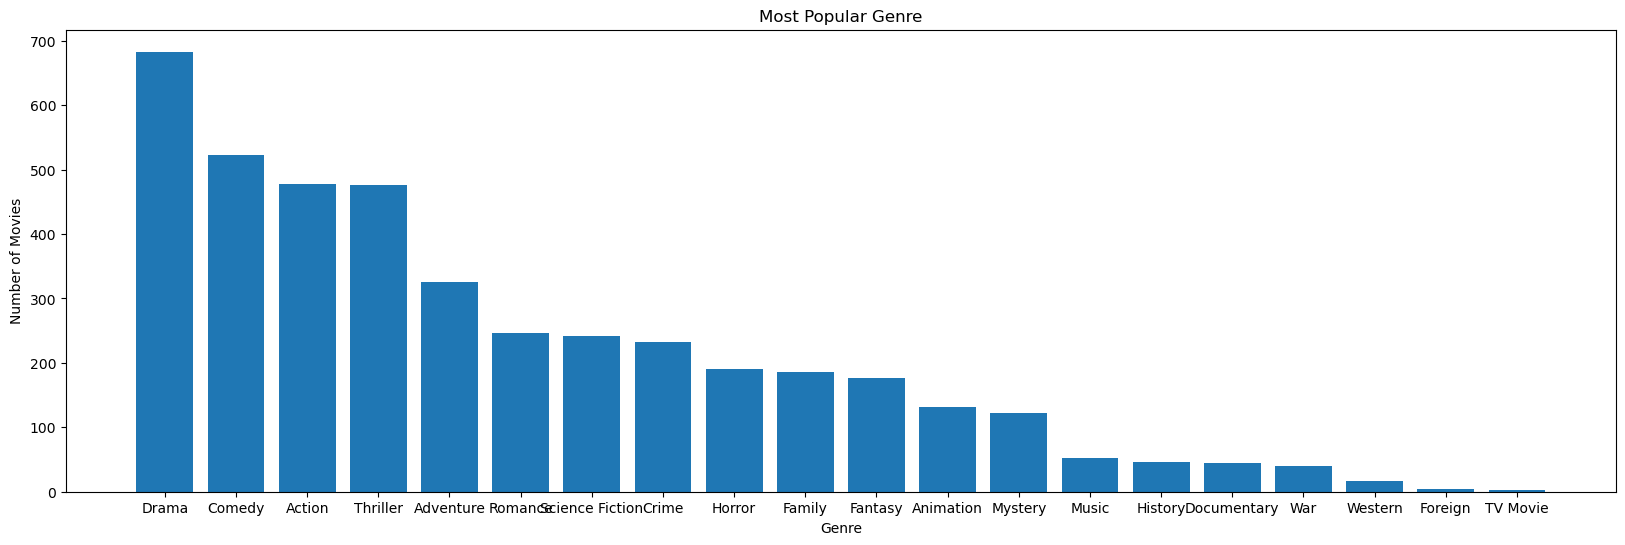

In [15]:
# what is the most popular genre
df_genres = dataframe['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genre')

# Count the occurrences of each genre
genre_counts = df_genres.value_counts()

# Plot the most popular genre
plt.figure(figsize=(20, 6))
plt.bar(genre_counts.index, genre_counts)
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Most Popular Genre')
plt.show()

In [4]:
import pandas as pd

# Assuming you have a dataset or can create one
# For example:
data = {
    "movie_title": ["Movie A", "Movie B", "Movie C"],
    "revenue": [150000000, 80000000, 200000000]  # Revenue values for the movies
}

# Create a DataFrame
dataframe = pd.DataFrame(data)

# Filter for high-revenue movies
high_revenue_movies = dataframe[dataframe["revenue"] > 100000000]

# Analyze properties of high-revenue movies
high_revenue_movies.describe()

revenue
count  2.000000e+00
mean   1.750000e+08
std    3.535534e+07
min    1.500000e+08
25%    1.625000e+08
50%    1.750000e+08
75%    1.875000e+08
max    2.000000e+08

###Drawing conclusions or making predictions from TMDb movie data could involve various analyses and insights. Here are some common types of analyses and conclusions you might draw from this dataset:

Descriptive Statistics:
Average Revenue: Calculate the average revenue generated by movies in the dataset.
Popular Genres: Identify the most common genres among movies.
Runtime Distribution: Analyze the distribution of movie runtimes.
Revenue Analysis:
Trend Analysis: Check if there's a trend in movie revenue over the years.
Correlation Analysis: Investigate correlations between factors like budget, popularity, and revenue.